<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/SVD/svd_matrix_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing some useful library
import numpy as np
from scipy.linalg import svd


In [2]:
## performing the svd on a matrix

X = np.array([[3, 3, 2], [2, 3, -2]])
print(X)

[[ 3  3  2]
 [ 2  3 -2]]


In [3]:
U, singular_w, v_transpose = svd(X)

print("U: \n", U)
print("singular W: \n", singular_w)
print("v_transpose: \n", v_transpose)


U: 
 [[-0.7815437 -0.6238505]
 [-0.6238505  0.7815437]]
singular W: 
 [5.54801894 2.86696457]
v_transpose: 
 [[-0.64749817 -0.7599438  -0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]


In [4]:
## Now calculate the pseudon inverse

singular_inv = 1.0/singular_w

s_inv = np.zeros(X.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]

## calculate the pseudo inverse

M = np.dot(np.dot(v_transpose.T, s_inv.T), U.T)
print(M)


[[ 0.11462451  0.04347826]
 [ 0.07114625  0.13043478]
 [ 0.22134387 -0.26086957]]


In [5]:
## Now performing the svd on image

import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray


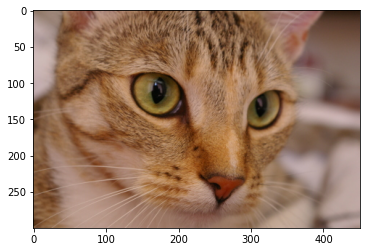

In [6]:
cat = data.chelsea()
plt.imshow(cat)

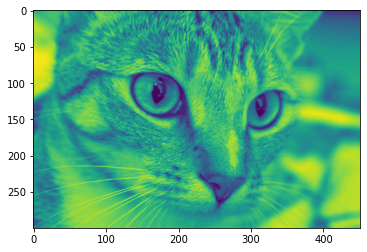

In [7]:
## Converting the rgb2gray
gray_cat = rgb2gray(cat)
plt.imshow(gray_cat)

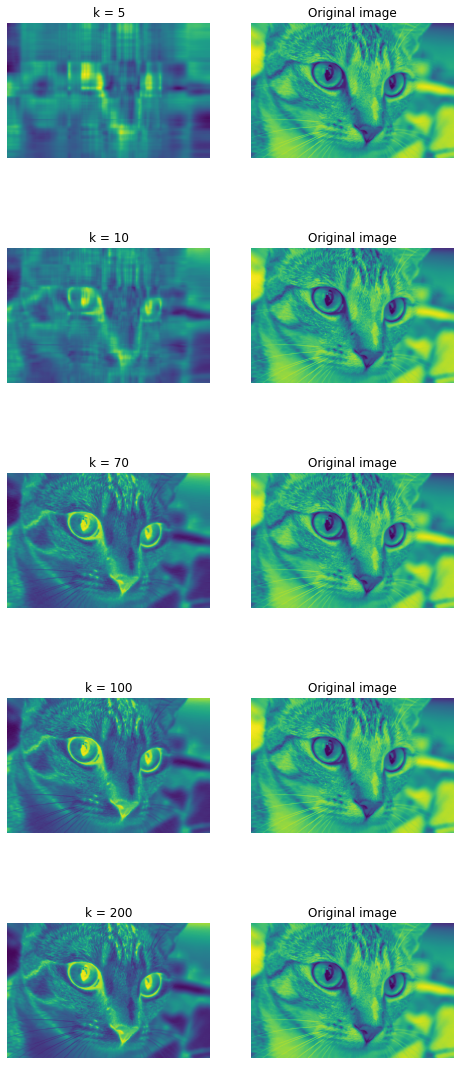

In [24]:
## Now performing the SVD on image

U, S, V_T = svd(gray_cat, full_matrices = True) 
## Here full_matrices is false because it will return only first m columns otherwise it will be messy
S = np.diag(S)

fig, ax = plt.subplots(5, 2, figsize=(8, 20))

cur_fig = 0

for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[cur_fig][0].imshow(256-cat_approx)
    ax[cur_fig][0].set_title("k = "+str(r))
    ax[cur_fig][0].axis('off')

    ax[cur_fig][1].imshow(gray_cat)
    ax[cur_fig][1].set_title("Original image")
    ax[cur_fig][1].axis("off")
    cur_fig +=1
plt.show()




In [11]:
## Downloading an external image of human

!wget https://images.firstpost.com/wp-content/uploads/2022/01/Hrithik-roshan-1.jpg

--2022-07-15 11:07:32--  https://images.firstpost.com/wp-content/uploads/2022/01/Hrithik-roshan-1.jpg
Resolving images.firstpost.com (images.firstpost.com)... 23.216.147.46, 23.216.147.66, 2600:1409:d000::17df:3793, ...
Connecting to images.firstpost.com (images.firstpost.com)|23.216.147.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30927 (30K) [image/jpeg]
Saving to: ‘Hrithik-roshan-1.jpg’

Hrithik-roshan-1.jp 100%[===================>]  30.20K  --.-KB/s    in 0s      

2022-07-15 11:07:32 (77.8 MB/s) - ‘Hrithik-roshan-1.jpg’ saved [30927/30927]



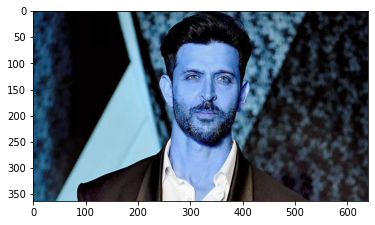

In [12]:
## Importing the downloaded image
import cv2 as cv

img = cv.imread('Hrithik-roshan-1.jpg')
plt.imshow(img)

(363, 640)

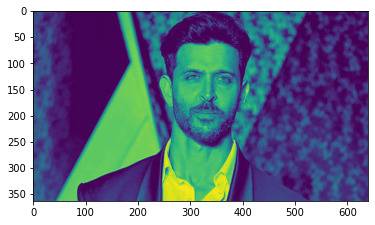

In [17]:
## Converting into the gray image

rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(rgb, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
gray.shape

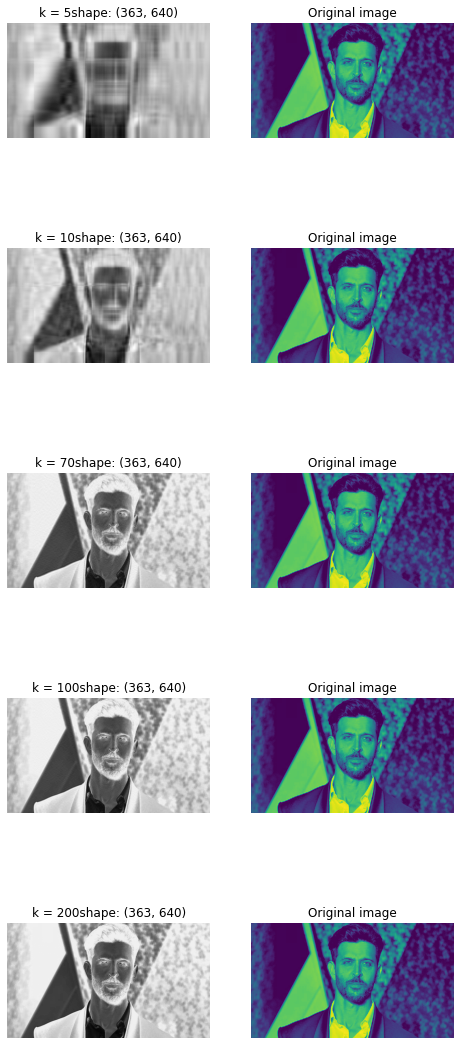

In [26]:
## Now performing the svd on thid image

U, S, V_T = svd(gray, full_matrices = False)
S = np.diag(S)

fig, ax = plt.subplots(5, 2, figsize=(8, 20))

cur_fig = 0
## r is here rank of matrices for matrix multiplication
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    px = ax[cur_fig][0].imshow(256-cat_approx) ## Here color is inverted by substracting the image matrix from 256
    ax[cur_fig][0].set_title("k = "+str(r)+"shape: "+str(cat_approx.shape))
    ax[cur_fig][0].axis('off')
    px.set_cmap('gray')

    ax[cur_fig][1].imshow(gray)
    ax[cur_fig][1].set_title("Original image")
    ax[cur_fig][1].axis("off")
    cur_fig +=1
plt.show()



